# Otimização Multi-Objetivo e NSGA

## Introdução

A otimização multi-objetivo é o processo de encontrar soluções para problemas que envolvem **múltiplos objetivos conflitantes**. Diferentemente da otimização com um único objetivo, aqui não há uma solução única "ótima". Em vez disso, busca-se um conjunto de soluções chamadas de **fronteira de Pareto**, onde nenhuma solução pode ser melhorada em um objetivo sem piorar outro.

Neste notebook, apresentamos um exemplo com dois objetivos aplicados a uma única variável. Trata-se de um caso simples, mas extremamente útil para compreender o funcionamento dos algoritmos **NSGA**. A simplicidade do exemplo permite a visualização geométrica e uma compreensão intuitiva dos resultados, facilitando a análise e a interpretação da fronteira de Pareto gerada.


## Conceitos Fundamentais

### Problema Multiobjetivo

Um problema de otimização multiobjetivo pode ser formalmente descrito como:

$$
\min F(x) = (f_1(x), f_2(x), \dots, f_m(x)), \quad x \in X
$$

onde:
- $X$ representa o espaço de decisão, ou seja, o conjunto de todas as soluções possíveis.
- $F(x)$ é um vetor de $m$ funções objetivo, cada uma $f_i : X \rightarrow \mathbb{R}$, para $i = 1, \dots, m$.
- O objetivo é encontrar um conjunto de soluções ótimas de Pareto, ou seja, soluções onde nenhuma melhora em um objetivo pode ser alcançada sem piorar pelo menos outro objetivo.

### Definição: Espaço de Objetivos

Seja $F(x) = (f_1(x), f_2(x), \dots, f_m(x))$ um vetor de $m$ funções objetivo definidas em um domínio $X \subseteq \mathbb{R}^n$, o **espaço de objetivos** é o conjunto de pontos no espaço $\mathbb{R}^m$ alcançáveis pelas funções objetivo quando avaliadas sobre $X$. Isto é:
$$
Y = F(X) = \{ F(x) \in \mathbb{R}^m \mid x \in X \},
$$
onde $Y \subseteq \mathbb{R}^m$ é o espaço de objetivos, e $F(x) = (f_1(x), f_2(x), \dots, f_m(x))$.


### Definição: Solução Dominada

Uma solução $x_1$ *domina* $x_2$ se for **melhor em todos os objetivos** e **estritamente melhor em pelo menos um objetivo**. Neste caso denotamos $x_1\prec x_2$ e dizemos que $y_2=f(x_2)$ é *dominada* por $y_1=f(x_1)$. Formalmente, para $n$ objetivos podemos denotar:
$$
x_1\prec x_2 \Leftrightarrow 
\begin{cases}
\forall i\in\{1,...,n\} : f_i(x_1)\le f_i(y_2) \\
\exists i\in\{1,...,n\} : f_i(x_1)< f_i(y_2)
\end{cases}
$$

### Definição: Fronteira de Pareto

A *Fronteira de Pareto* é o conjunto de todas as soluções que não são dominadas por nenhuma outra solução.
Formalmente, dado um espaço de decisão $X$ podemos definir o *conjunto eficiente* $X^*$ por:
$$
X^*:=\{x^*\in X^*:x\nprec x^*,\forall x\in X\}
$$
Assim, a *fronteira de Pareto* é a imagem de $X^*$
$$
P:=\{y\in Y:y=f(x),\forall x\in X^*\}
$$
onde $Y$ é o espaço objetivo.


## Exemplo com duas Funções Quadráticas

Vamos considerar um problema simples com duas funções objetivo:

$$
f_1(x) = (x - 2)^2
$$

$$
f_2(x) = (x + 2)^2
$$

**Análise do Problema**

1. $f_1(x)$: É uma função quadrática que atinge seu mínimo quando $x = 2$.

2. $f_2(x)$: É uma função quadrática que atinge seu mínimo quando $x = -2$.

3. Os objetivos estão em conflito, pois minimizando $f_1(x)$ (levando $x$ para 2) aumentamos $f_2(x)$, e vice-versa.

**Interpretação Geométrica**

- Para valores de $x$ intermediários entre $-2$ e $2$, nenhum dos objetivos é minimizado ao extremo.

- O conjunto de soluções Pareto-ótimas é o intervalo $x \in [-2, 2]$, pois cada ponto nesse intervalo representa um compromisso entre os dois objetivos.


### Espaço de Objetivos do Exemplo
Para o caso específico com:
$$
f_1(x) = (x-2)^2, \quad f_2(x) = (x+2)^2,
$$
e supondo que $x$ pertença a um intervalo $X = [a, b] \subset \mathbb{R}$, o espaço de objetivos é dado por:
$$
F = \{ (f_1(x), f_2(x)) \mid x \in [a, b] \},
$$
com $f_1: X \to \mathbb{R}$ e $f_2: X \to \mathbb{R}$. Em termos de notação, o espaço objetivo $F$ pode ser representado como $f_1 \times f_2 \subseteq \mathbb{R}^2$, significando que ele é um subconjunto do plano $\mathbb{R}^2$, formado pelas imagens de $f_1(x)$ e $f_2(x)$ para $x \in X$.


O código a seguir realiza o plot dos gráficos das funções objetivo $f_1$ e $f_2$ no espaço de decisão e a correspondente fronteira de Pareto no espaço de objetivos.  

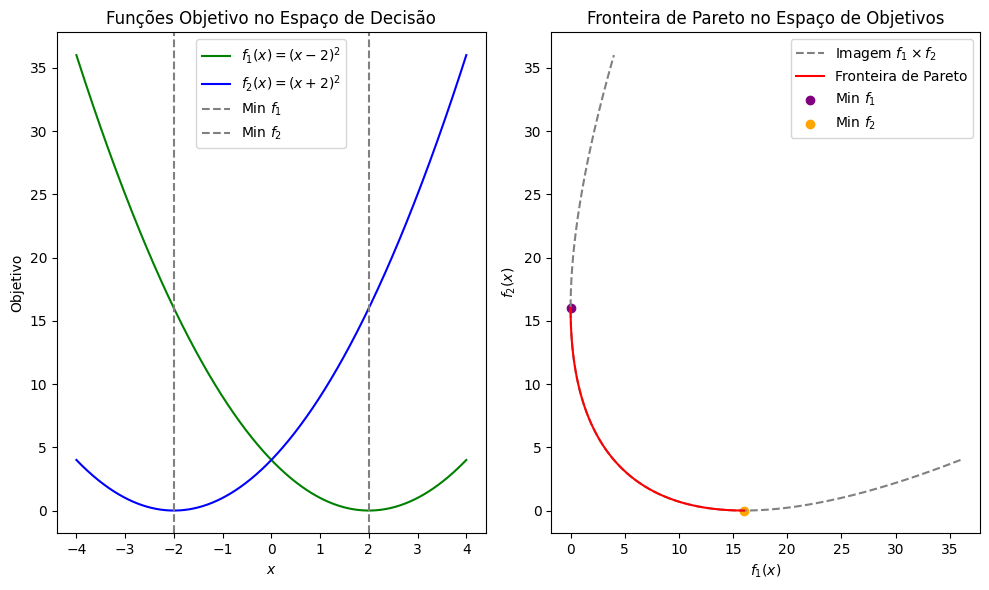

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo as funções objetivo
def f1(x):
    return (x - 2)**2

def f2(x):
    return (x + 2)**2

# Valores de x
x = np.linspace(-4, 4, 500)
f1_vals = f1(x)
f2_vals = f2(x)

y = np.linspace(-2, 2, 500)
pareto_f1_vals = f1(y)
pareto_f2_vals = f2(y)

# Plotando os gráficos
plt.figure(figsize=(10, 6))

# Curva de Pareto no espaço de decisão (x)
plt.subplot(1, 2, 1)
plt.plot(x, f1_vals, label='$f_1(x) = (x-2)^2$', color='green')
plt.plot(x, f2_vals, label='$f_2(x) = (x+2)^2$', color='blue')
plt.axvline(-2, linestyle='--', color='gray', label='Min $f_1$')
plt.axvline(2, linestyle='--', color='gray', label='Min $f_2$')
plt.title("Funções Objetivo no Espaço de Decisão")
plt.xlabel("$x$")
plt.ylabel("Objetivo")
plt.legend()

# Fronteira de Pareto no espaço de objetivos
plt.subplot(1, 2, 2)
plt.plot(f1_vals, f2_vals, linestyle='--', label='Imagem $f_1\\times f_2$', color='gray')
plt.plot(pareto_f1_vals, pareto_f2_vals, label="Fronteira de Pareto", color='red')
plt.scatter(f1(2), f2(2), color='purple', label='Min $f_1$')
plt.scatter(f1(-2), f2(-2), color='orange', label='Min $f_2$')
plt.title("Fronteira de Pareto no Espaço de Objetivos")
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.legend()

plt.tight_layout()
plt.show()


## Introdução ao NSGA (Non-dominated Sorting Genetic Algorithm)

O **NSGA** é um dos algoritmos mais populares para otimização multi-objetivo. Ele utiliza técnicas evolutivas, como seleção, cruzamento e mutação, para encontrar um conjunto de soluções que se aproximam da **fronteira de Pareto**. 

Embora o NSGA tenha sido sucedido pelo **NSGA-II**, ele introduziu conceitos importantes que ainda são amplamente utilizados. A seguir, exploraremos os principais passos do NSGA.

### Funcionamento do NSGA

1. **Inicialização**
   - Gera-se uma população inicial aleatória de tamanho $N$, com cada indivíduo representando uma solução no espaço de decisão.
   - Cada solução é avaliada em todas as funções objetivo.

2. **Ordenação Não-Dominada**
   - A população é classificada em **níveis de dominância**:
     - **Fronteira 1**: Conjunto de soluções não dominadas por nenhuma outra solução na população.
     - **Fronteira 2**: Soluções dominadas apenas pelas soluções da Fronteira 1.
     - E assim por diante.

3. **Cálculo da Diversidade (Crowding Distance)**
   - Dentro de cada fronteira, é calculada a **distância de crowding** para garantir que as soluções estejam bem distribuídas no espaço de objetivos.

4. **Seleção**
   - As soluções são selecionadas com base na sua classificação (nível de dominância) e diversidade (distância de crowding).

5. **Operadores Genéticos**
   - **Cruzamento**: Combina soluções existentes para gerar novos indivíduos.
   - **Mutação**: Introduz variabilidade aleatória nas soluções.

6. **Atualização**
   - As novas soluções geradas (filhos) são combinadas com a população atual, e o processo de ordenação não-dominada e seleção é repetido.

7. **Iteração**
   - O algoritmo repete o processo por várias gerações, refinando as soluções e aproximando a fronteira de Pareto.

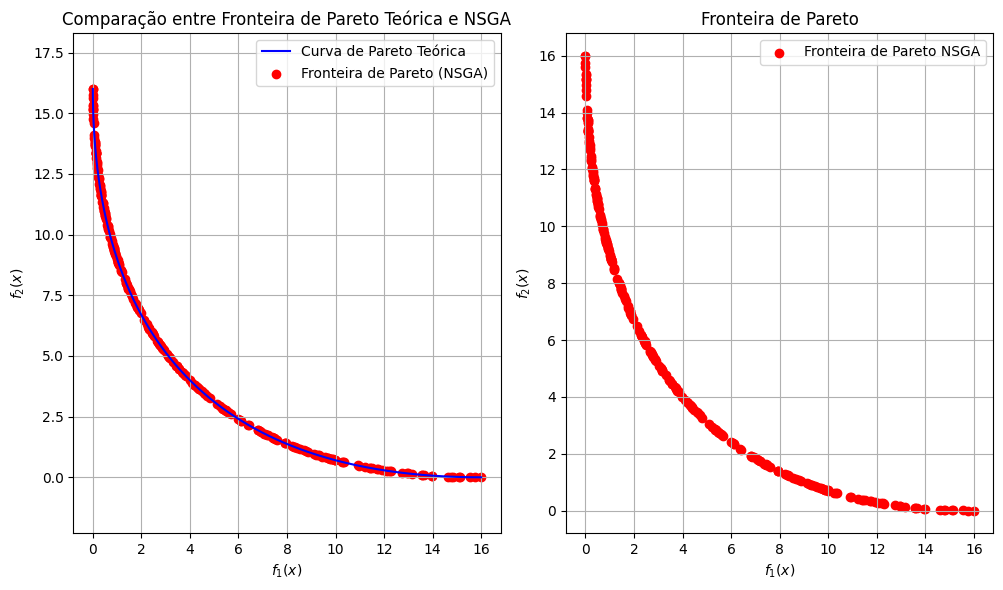

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Inicialização da população
def initialize_population(size, bounds):
    return [random.uniform(bounds[0], bounds[1]) for _ in range(size)]

# Avaliação
def evaluate_population(population):
    return [(f1(x), f2(x)) for x in population]

# Dominância
def dominates(obj1, obj2):
    """
    Verifica se obj1 domina obj2:
    - obj1 não é pior que obj2 em todos os objetivos.
    - obj1 é estritamente melhor que obj2 em pelo menos um objetivo.
    """
    return all(x <= y for x, y in zip(obj1, obj2)) and any(x < y for x, y in zip(obj1, obj2))

# Ordenação não-dominada (Implementação NSGA-II)
def fast_nondominated_sort(objectives):
    """
    Classifica as soluções em níveis de dominância.
    Retorna uma lista de listas (as fronteiras de dominância).
    """
    fronts = [[]]
    domination_count = [0] * len(objectives)
    dominated_solutions = [[] for _ in range(len(objectives))]

    # Identifica a relação de dominância entre todas as soluções
    for p in range(len(objectives)):
        for q in range(len(objectives)):
            if dominates(objectives[p], objectives[q]):
                dominated_solutions[p].append(q)
            elif dominates(objectives[q], objectives[p]):
                domination_count[p] += 1

        if domination_count[p] == 0:
            fronts[0].append(p)

    # Construção iterativa das próximas fronteiras
    i = 0
    while len(fronts[i]) > 0:
        next_front = []
        for p in fronts[i]:
            for q in dominated_solutions[p]:
                domination_count[q] -= 1
                if domination_count[q] == 0:
                    next_front.append(q)
        i += 1
        fronts.append(next_front)

    fronts.pop()
    return fronts


# Cruzamento
def crossover(parent1, parent2):
    return (parent1 + parent2) / 2

# Mutação
def mutation(individual, bounds, mutation_rate=0.5):
    if random.random() < mutation_rate:
        individual += random.uniform(-0.1, 0.1)
        individual = np.clip(individual, bounds[0], bounds[1])  # Garante que o valor permaneça nos limites
    return individual

def plot(pareto_front):
    # Gerar a curva de Pareto teórica
    x_theoretical = np.linspace(-2, 2, 500)
    f1_theoretical = f1(x_theoretical)
    f2_theoretical = f2(x_theoretical)
            
    # Plotando os gráficos
    plt.figure(figsize=(10, 6))

    # Curva de Pareto no espaço de decisão (x)
    plt.subplot(1, 2, 1)
    plt.plot(f1_theoretical, f2_theoretical, label="Curva de Pareto Teórica", color="blue")
    plt.scatter(*zip(*pareto_front), label="Fronteira de Pareto (NSGA)", color="red")
    plt.title("Comparação entre Fronteira de Pareto Teórica e NSGA")
    plt.xlabel("$f_1(x)$")
    plt.ylabel("$f_2(x)$")
    plt.legend()
    plt.grid()
    plt.axis("equal")

    # Fronteira de Pareto no espaço de objetivos
    plt.subplot(1, 2, 2)
    plt.scatter(*zip(*pareto_front), label="Fronteira de Pareto NSGA", color="red")
    plt.title("Fronteira de Pareto")
    plt.xlabel("$f_1(x)$")
    plt.ylabel("$f_2(x)$")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Algoritmo NSGA
def nsga(pop_size, generations, bounds):
    """
    Implementa o algoritmo NSGA.
    - Inicializa a população.
    - Avalia as soluções.
    - Classifica em níveis de dominância.
    - Evolui a população através de cruzamento e mutação.
    """
    population = initialize_population(pop_size, bounds)

    for gen in range(generations):
        # Avaliação
        objectives = evaluate_population(population)

        # Ordenação não-dominada
        fronts = fast_nondominated_sort(objectives)

        # Visualização no final
        if gen == generations - 1:
            pareto_front = [objectives[i] for i in fronts[0]]
            pareto_front.sort()
            
            plot(pareto_front)
        
        # Nova geração
        new_population = []
        while len(new_population) < pop_size:
            # Seleção de dois pais
            parent1, parent2 = random.sample(population, 2)

            # Cruzamento
            child = crossover(parent1, parent2)

            # Mutação
            child = mutation(child, bounds)

            new_population.append(child)

        population = population + new_population

# Executar NSGA
nsga(pop_size=50, generations=10, bounds=(-10, 10))


## Introdução ao NSGA-II

O NSGA-II aprimora o NSGA com três melhorias principais:
1. **Ordenamento Não Dominado com Complexidade Reduzida**: Reduz a complexidade do ordenamento não dominado de $O(MN^3)$ para $O(MN^2)$, onde $N$ é o tamanho da população e $M$ é o número de objetivos.
2. **Mecanismo de Crowding Distance para Diversidade**: Usa a métrica de distância de aglomeração (*crowding distance*) para preservar a diversidade, eliminando a função de compartilhamento do NSGA.
3. **Estratégia de Arquivo Elitista**: Garante que as melhores soluções (não dominadas) sejam mantidas para a próxima geração, facilitando a convergência para a fronteira de Pareto.

### Funcionamento do NSGA-II

1. **Inicialização**
   - Uma população inicial aleatória de tamanho $N$ é gerada, com cada indivíduo representando uma solução no espaço de decisão.
   - Cada solução é avaliada em todas as funções objetivo para determinar seus valores no espaço de objetivos.

2. **Ordenação Não-Dominada**
   - A população é classificada em **fronteiras de Pareto**:
     - **Fronteira 1**: Conjunto de soluções que não são dominadas por nenhuma outra solução na população.
     - **Fronteira 2**: Conjunto de soluções dominadas apenas pelas da Fronteira 1.
     - Esse processo é repetido até que todas as soluções sejam classificadas em diferentes níveis de dominância.

3. **Cálculo da Diversidade (Distância de Crowding)**
   - Dentro de cada fronteira, é calculada a **distância de crowding** para medir a proximidade entre soluções no espaço de objetivos.
   - Este cálculo garante que a diversidade da população seja mantida, evitando que as soluções se concentrem em apenas uma parte da fronteira.

4. **Seleção com Elitismo**
   - As soluções são selecionadas para a próxima geração com base na sua classificação de dominância (nível da fronteira) e na diversidade (distância de crowding).
   - A população dos pais é combinada com os filhos, e um novo conjunto de tamanho $N$ é escolhido para a próxima geração, garantindo que as melhores soluções sejam preservadas.

5. **Operadores Genéticos**
   - **Cruzamento**: Combina duas soluções (pais) para gerar novas soluções (filhos), explorando o espaço de busca.
   - **Mutação**: Introduz pequenas alterações aleatórias nas soluções, promovendo variabilidade e explorando regiões não visitadas do espaço de decisão.

6. **Atualização da População**
   - A população atual é substituída pela nova população gerada, composta pelas melhores soluções (combinando pais e filhos).

7. **Iteração**
   - O processo é repetido por várias gerações, refinando as soluções progressivamente e aproximando a fronteira de Pareto ótima.

8. **Resultado**
   - Após o número definido de gerações, o algoritmo retorna as soluções encontradas na **Fronteira de Pareto**, representando o melhor compromisso entre os objetivos conflitantes.


### Componentes Essenciais do NSGA-II

#### Ordenação Não-Dominada
O objetivo é dividir a população em níveis com base na relação de dominância:
- Uma solução $x_1$ domina $x_2$ se:
  - $x_1$ não é pior que $x_2$ em todos os objetivos.
  - $x_1$ é estritamente melhor que $x_2$ em pelo menos um objetivo.

#### Distância de Crowding
Para preservar a diversidade, o NSGA-II calcula uma métrica que estima o quão "isolada" uma solução está no espaço de objetivos. A **crowding distance** é definida como uma distância heurística que mede a densidade local de soluções em torno de uma solução específica dentro de um front de dominância no espaço objetivo. Formalmente, seja $F$ um front de dominância contendo $n$ soluções, e $M$ o número de funções objetivo. Para uma solução $i \in F$, a crowding distance $d_i$ é dada por:

$$
d_i = \sum_{m=1}^M \frac{f_{m,i+1} - f_{m,i-1}}{f_{m,\text{max}} - f_{m,\text{min}}}
$$

1. **$f_{m,i}$**:
   - Valor da $m$-ésima função objetivo para a solução $i$.

2. **$f_{m,i+1}$ e $f_{m,i-1}$**:
   - Valores da $m$-ésima função objetivo para as soluções vizinhas imediatamente à frente ($i+1$) e atrás ($i-1$) de $i$, após ordenar $F$ em relação a $f_m$.

3. **$f_{m,\text{max}}$ e $f_{m,\text{min}}$**:
   - Valores máximo e mínimo da $m$-ésima função objetivo no front $F$.

4. **Normalização**:
   - As distâncias $f_{m,i+1} - f_{m,i-1}$ são normalizadas pela diferença entre $f_{m,\text{max}}$ e $f_{m,\text{min}}$, garantindo que a crowding distance seja independente da escala dos objetivos.

**Casos Especiais**

- **Soluções Extremas**:
  - As soluções com $f_{m,i} = f_{m,\text{max}}$ ou $f_{m,i} = f_{m,\text{min}}$ recebem uma crowding distance infinita ($d_i = \infty$) para garantir sua preservação na próxima geração.
  - Formalmente:
    $$
    d_{i} = \infty \quad \text{se } f_{m,i} = f_{m,\text{max}} \text{ ou } f_{m,\text{min}}.
    $$

- **Fronteiras com Menos de 3 Soluções**:
  - Para fronts com menos de 3 soluções ($n < 3$), todos os valores de $d_i$ podem ser atribuídos como $\infty$, pois não há vizinhos para calcular distâncias.

**Algoritmo**

1. **Ordenação**:
   - Ordene $F$ em relação a cada objetivo $f_m$, produzindo $F_m = \{ f_{m,1}, f_{m,2}, \ldots, f_{m,n} \}$, onde $f_{m,1} \leq f_{m,2} \leq \ldots \leq f_{m,n}$.

2. **Cálculo das Distâncias**:
   - Para cada solução $i$ (exceto extremas), calcule a distância:
     $$
     d_i^m = \frac{f_{m,i+1} - f_{m,i-1}}{f_{m,\text{max}} - f_{m,\text{min}}}, \quad i = 2, \ldots, n-1
     $$
   - Soluções extremas:
     $$
     d_1^m = d_n^m = \infty
     $$

3. **Soma das Distâncias**:
   - Para cada solução $i$:
     $$
     d_i = \sum_{m=1}^M d_i^m
     $$

### Exemplo Prático: Duas Funções Quadráticas

Vamos aplicar o NSGA ao exemplo discutido anteriormente ($f_1(x)$ e $f_2(x)$).

#### Etapas

1. **Inicialização**
   - Gerar uma população inicial de valores $x \in [-3, 3]$.

2. **Avaliação**
   - Avaliar cada indivíduo nas funções $f_1(x) = (x - 2)^2$ e $f_2(x) = (x + 2)^2$.

3. **Ordenação Não-Dominada**
   - Classificar os indivíduos em níveis de dominância com base nos valores de $f_1$ e $f_2$.

4. **Cálculo da Diversidade**
   - Calcular a distância de crowding para garantir boa distribuição na fronteira de Pareto.

5. **Iteração**
   - Aplicar cruzamento e mutação para criar novas soluções.

### Implementação NSGA-II para o exemplo com duas funções

Funções do exemplo $f_1(x)=(x-2)^2$ e $f_2(x)=(x+2)^2$

In [3]:
# Funções de avaliação
def f1(x):
    return (x - 2)**2

def f2(x):
    return (x + 2)**2

Funções essenciais do NSGA

In [4]:
import random
import heapq

# Inicialização da população
def initialize_population(size, bounds):
    return [random.uniform(bounds[0], bounds[1]) for _ in range(size)]

# Avaliação
def evaluate_population(population):
    return [(f1(x), f2(x)) for x in population]

# Ordenação não-dominada eficiente
def fast_nondominated_sort(objectives):
    fronts = [[]]
    domination_count = [0] * len(objectives)
    dominated_solutions = [[] for _ in range(len(objectives))]
    ranks = [0] * len(objectives)

    for p in range(len(objectives)):
        for q in range(len(objectives)):
            if dominates(objectives[p], objectives[q]):
                dominated_solutions[p].append(q)
            elif dominates(objectives[q], objectives[p]):
                domination_count[p] += 1

        if domination_count[p] == 0:
            ranks[p] = 0
            fronts[0].append(p)

    i = 0
    while fronts[i]:
        next_front = []
        for p in fronts[i]:
            for q in dominated_solutions[p]:
                domination_count[q] -= 1
                if domination_count[q] == 0:
                    ranks[q] = i + 1
                    next_front.append(q)
        i += 1
        fronts.append(next_front)

    fronts.pop()
    return fronts, ranks

# Dominância
def dominates(obj1, obj2):
    return all(x <= y for x, y in zip(obj1, obj2)) and any(x < y for x, y in zip(obj1, obj2))

# Distância de crowding
def crowding_distance(front, objectives):
    distances = [0] * len(front)
    for m in range(len(objectives[0])):
        sorted_front = sorted(front, key=lambda i: objectives[i][m])
        distances[0] = distances[-1] = float('inf')
        for i in range(1, len(front) - 1):
            distances[i] += (objectives[sorted_front[i + 1]][m] - objectives[sorted_front[i - 1]][m])
    return distances

# Seleção com elitismo
def select_next_population(fronts, objectives, population, pop_size):
    next_population = set()  # Usar conjunto para evitar duplicatas
    for front in fronts:
        if len(next_population) + len(front) <= pop_size:
            next_population.update(front)
        else:
            # Calcular as distâncias de aglomeração para a frente atual
            distances = crowding_distance(front, objectives)
            
            # Selecionar os elementos com maior distância usando heap
            largest_distances = heapq.nlargest(pop_size - len(next_population),
                                               zip(front, distances),
                                               key=lambda x: x[1])
            
            # Adicionar as soluções selecionadas
            next_population.update(solution for solution, _ in largest_distances)
            break
    
    # Garantir que todas as soluções relevantes estão na população final
    final_population = set(population[i] for i in next_population) | next_population
    return list(final_population)


Main Loop com plot do gráfico dos resultados

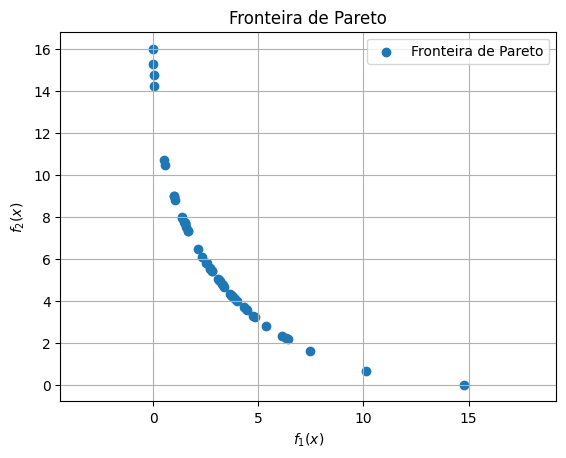

In [5]:
import matplotlib.pyplot as plt

# Algoritmo NSGA-II
def nsga2(pop_size, generations, bounds):
    # Prepara população inicial
    population = initialize_population(pop_size, bounds)
    for gen in range(generations):
        # Avaliar a nova população
        objectives = evaluate_population(population)
        fronts, _ = fast_nondominated_sort(objectives)

        if gen == generations - 1:
            pareto_front = [objectives[i] for i in fronts[0]]
            plt.scatter(*zip(*pareto_front), label="Fronteira de Pareto")
            plt.title("Fronteira de Pareto")
            plt.xlabel("$f_1(x)$")
            plt.ylabel("$f_2(x)$")
            plt.legend()
            plt.axis('equal')
            plt.grid()
            plt.show()

        # Criar descendentes usando operadores genéticos
        offspring = []
        while len(offspring) < pop_size:
            parent1, parent2 = random.sample(population, 2)
            child = (parent1 + parent2) / 2  # Cruzamento simples
            if random.random() < 0.1:  # Mutação
                child += random.uniform(-0.1, 0.1)
            offspring.append(child)
            
        # Combinar pais e descendentes
        combined_population = population + offspring
        combined_objectives = evaluate_population(combined_population)
        
        # Realizar nova ordenação não-dominada
        combined_fronts, _ = fast_nondominated_sort(combined_objectives)
        
        # Selecionar próxima geração com elitismo
        population = select_next_population(combined_fronts, combined_objectives, combined_population, pop_size)

# Executar NSGA-II
nsga2(pop_size=50, generations=10, bounds=(-3, 3))


#### Comparação com curva teórica

In [6]:
# Gerar a curva de Pareto teórica
x_theoretical = np.linspace(-2, 2, 500) # 2 e -2 são os minimos de f1 e f2
f1_theoretical = f1(x_theoretical)
f2_theoretical = f2(x_theoretical)
# Estes valores são utilizados em vários blocos de código a seguir.

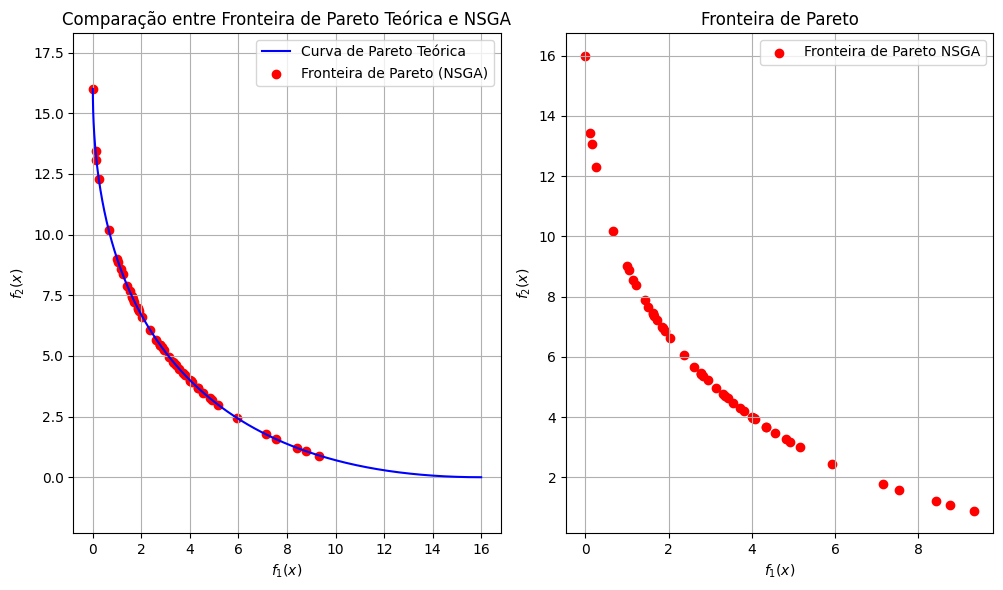

In [7]:

def nsga2_with_theorical(pop_size, generations, bounds):
    population = initialize_population(pop_size, bounds)
    for gen in range(generations):
        # Avaliar a nova população
        objectives = evaluate_population(population)
        fronts, _ = fast_nondominated_sort(objectives)

        if gen == generations - 1:
            # Visualizar a fronteira de Pareto na última geração
            pareto_front = [objectives[i] for i in fronts[0]]
                                                         
            # Plotando os gráficos
            plt.figure(figsize=(10, 6))

            # Curva de Pareto no espaço de decisão (x)
            plt.subplot(1, 2, 1)
            plt.plot(f1_theoretical, f2_theoretical, label="Curva de Pareto Teórica", color="blue")
            plt.scatter(*zip(*pareto_front), label="Fronteira de Pareto (NSGA)", color="red")
            plt.title("Comparação entre Fronteira de Pareto Teórica e NSGA")
            plt.xlabel("$f_1(x)$")
            plt.ylabel("$f_2(x)$")
            plt.legend()
            plt.grid()
            plt.axis("equal")

            # Fronteira de Pareto no espaço de objetivos
            plt.subplot(1, 2, 2)
            plt.scatter(*zip(*pareto_front), label="Fronteira de Pareto NSGA", color="red")
            plt.title("Fronteira de Pareto")
            plt.xlabel("$f_1(x)$")
            plt.ylabel("$f_2(x)$")
            plt.legend()
            plt.grid()

            plt.tight_layout()
            plt.show()

        # Criar descendentes usando operadores genéticos
        offspring = []
        while len(offspring) < pop_size:
            parent1, parent2 = random.sample(population, 2)
            child = (parent1 + parent2) / 2  # Cruzamento simples
            if random.random() < 0.1:  # Mutação
                child += random.uniform(-0.1, 0.1)
            offspring.append(child)
            
        # Combinar pais e descendentes
        combined_population = population + offspring
        combined_objectives = evaluate_population(combined_population)
        
        # Realizar nova ordenação não-dominada
        combined_fronts, _ = fast_nondominated_sort(combined_objectives)
        
        # Selecionar próxima geração com elitismo
        population = select_next_population(combined_fronts, combined_objectives, combined_population, pop_size)

# Executar NSGA-II
nsga2_with_theorical(pop_size=50, generations=10, bounds=(-5, 5))


#### Verificação da evolução das gerações

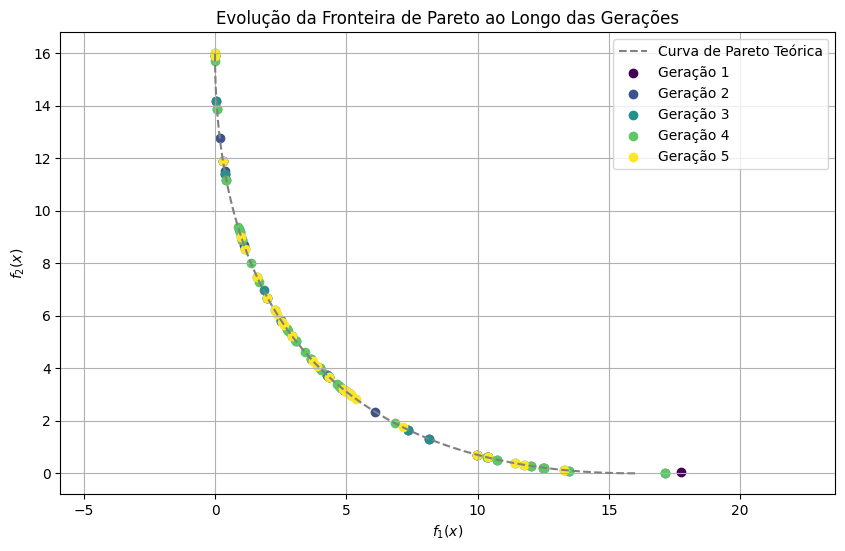

In [8]:

def nsga2_with_theorical_and_generations(pop_size, generations, bounds):
    population = initialize_population(pop_size, bounds)
    
    colors = plt.cm.viridis(np.linspace(0, 1, generations))  # Gradiente de cores para as gerações
    
    plt.figure(figsize=(10, 6))
    plt.plot(f1_theoretical, f2_theoretical, label="Curva de Pareto Teórica", color="gray", linestyle="--")
    
    pareto_front_plot = []
    for gen in range(generations):
        # Avaliar a nova população
        objectives = evaluate_population(population)
        fronts, _ = fast_nondominated_sort(objectives)

        # Plotar a primeira fronteira da geração atual
        pareto_front = [objectives[i] for i in fronts[0]]
        pareto_front.sort()
        pareto_front_plot = [e for e in pareto_front if e not in pareto_front_plot]
        plt.scatter(*zip(*pareto_front_plot), label=f"Geração {gen + 1}", color=colors[gen])

        # Criar descendentes usando operadores genéticos
        offspring = []
        while len(offspring) < pop_size:
            parent1, parent2 = random.sample(population, 2)
            child = (parent1 + parent2) / 2  # Cruzamento simples
            if random.random() < 0.1:  # Mutação
                child += random.uniform(-0.1, 0.1)
            offspring.append(child)
            
        # Combinar pais e descendentes
        combined_population = population + offspring
        combined_objectives = evaluate_population(combined_population)
        
        # Realizar nova ordenação não-dominada
        combined_fronts, _ = fast_nondominated_sort(combined_objectives)
        
        # Selecionar próxima geração com elitismo
        population = select_next_population(combined_fronts, combined_objectives, combined_population, pop_size)
    
    plt.title("Evolução da Fronteira de Pareto ao Longo das Gerações")
    plt.xlabel("$f_1(x)$")
    plt.ylabel("$f_2(x)$")
    plt.legend()
    plt.axis("equal")
    plt.grid()
    plt.show()

# Executar NSGA-II
nsga2_with_theorical_and_generations(pop_size=50, generations=5, bounds=(-7, 7))


### Mutação Adaptativa

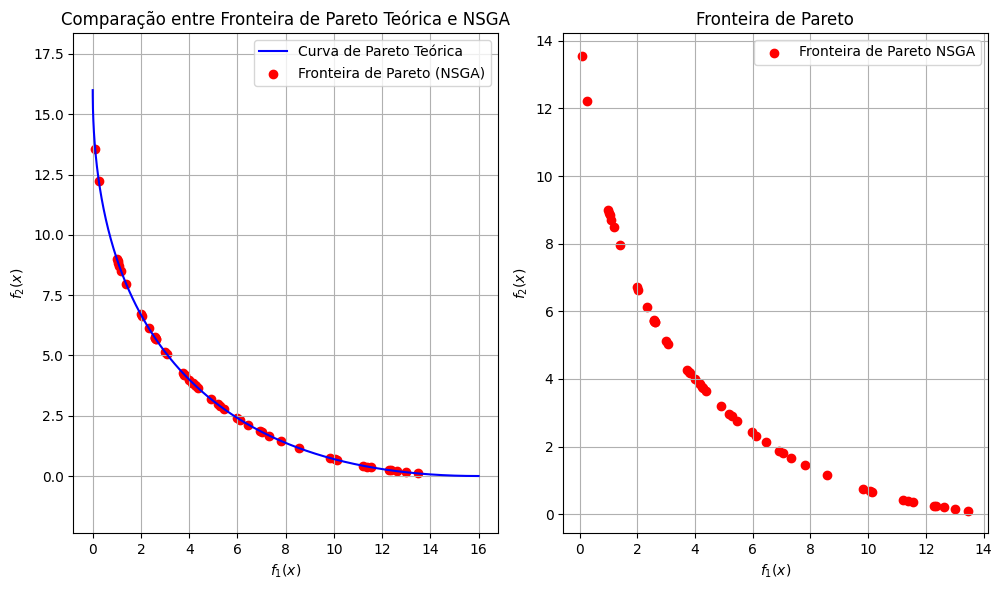

In [9]:
# Crossover
def crossover(parent1, parent2):
    w = random.uniform(0, 1)  # Peso aleatório
    return w * parent1 + (1 - w) * parent2

# Mutação
def mutation(individual, bounds, mutation_rate):
    if random.random() < mutation_rate:
        mutation_amount = random.uniform(-0.1, 0.1)
        individual += mutation_amount
        individual = np.clip(individual, bounds[0], bounds[1])  # Garante que o valor permaneça nos limites
    return individual

def nsga2_with_theorical(pop_size, generations, bounds, base_mutation_rate=0.1):
    population = initialize_population(pop_size, bounds)
    for gen in range(generations):
        # Avaliar a nova população
        objectives = evaluate_population(population)
        fronts, _ = fast_nondominated_sort(objectives)

        if gen == generations - 1:
            # Visualizar a fronteira de Pareto na última geração
            pareto_front = [objectives[i] for i in fronts[0]]
                                                         
            # Plotando os gráficos
            plt.figure(figsize=(10, 6))

            # Curva de Pareto no espaço de decisão (x)
            plt.subplot(1, 2, 1)
            plt.plot(f1_theoretical, f2_theoretical, label="Curva de Pareto Teórica", color="blue")
            plt.scatter(*zip(*pareto_front), label="Fronteira de Pareto (NSGA)", color="red")
            plt.title("Comparação entre Fronteira de Pareto Teórica e NSGA")
            plt.xlabel("$f_1(x)$")
            plt.ylabel("$f_2(x)$")
            plt.legend()
            plt.grid()
            plt.axis("equal")

            # Fronteira de Pareto no espaço de objetivos
            plt.subplot(1, 2, 2)
            plt.scatter(*zip(*pareto_front), label="Fronteira de Pareto NSGA", color="red")
            plt.title("Fronteira de Pareto")
            plt.xlabel("$f_1(x)$")
            plt.ylabel("$f_2(x)$")
            plt.legend()
            plt.grid()

            plt.tight_layout()
            plt.show()

        # Mutação adaptativa
        mutation_rate = base_mutation_rate * (1 - gen / generations)
        
        # Criar descendentes usando operadores genéticos
        offspring = []
        while len(offspring) < pop_size:
            # Seleção de dois pais
            parent1, parent2 = random.sample(population, 2)
            # Cruzamento
            child = crossover(parent1, parent2)
            # Mutação
            child = mutation(child, bounds, mutation_rate)            
            offspring.append(child)
            
        # Combinar pais e descendentes
        combined_population = population + offspring
        combined_objectives = evaluate_population(combined_population)
        
        # Realizar nova ordenação não-dominada
        combined_fronts, _ = fast_nondominated_sort(combined_objectives)
        
        # Selecionar próxima geração com elitismo
        population = select_next_population(combined_fronts, combined_objectives, combined_population, pop_size)

# Executar NSGA-II
nsga2_with_theorical(pop_size=50, generations=10, bounds=(-5, 5))


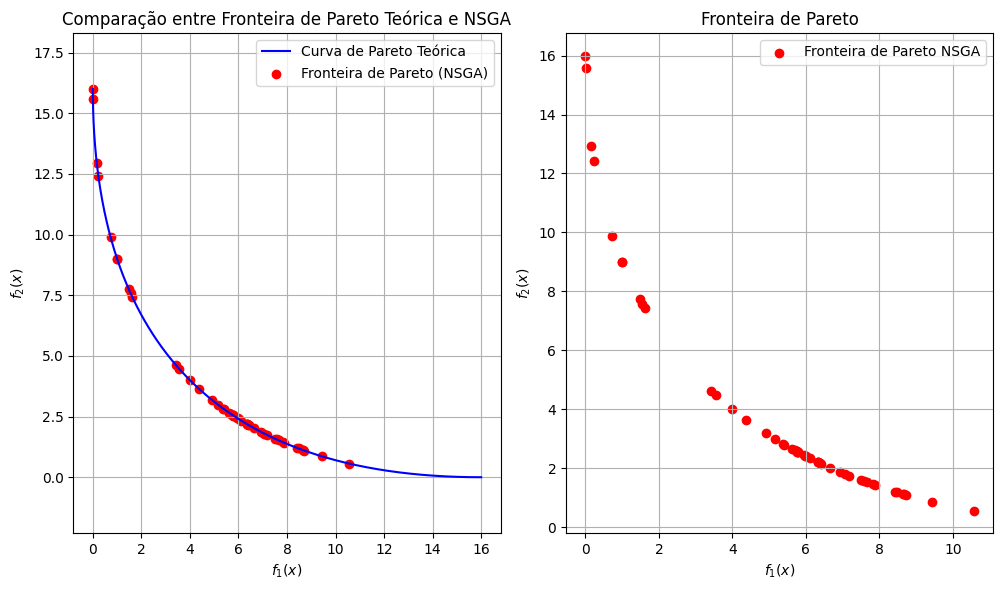

In [10]:
# Executar NSGA-II 20 generations
nsga2_with_theorical(pop_size=50, generations=20, bounds=(-5, 5))

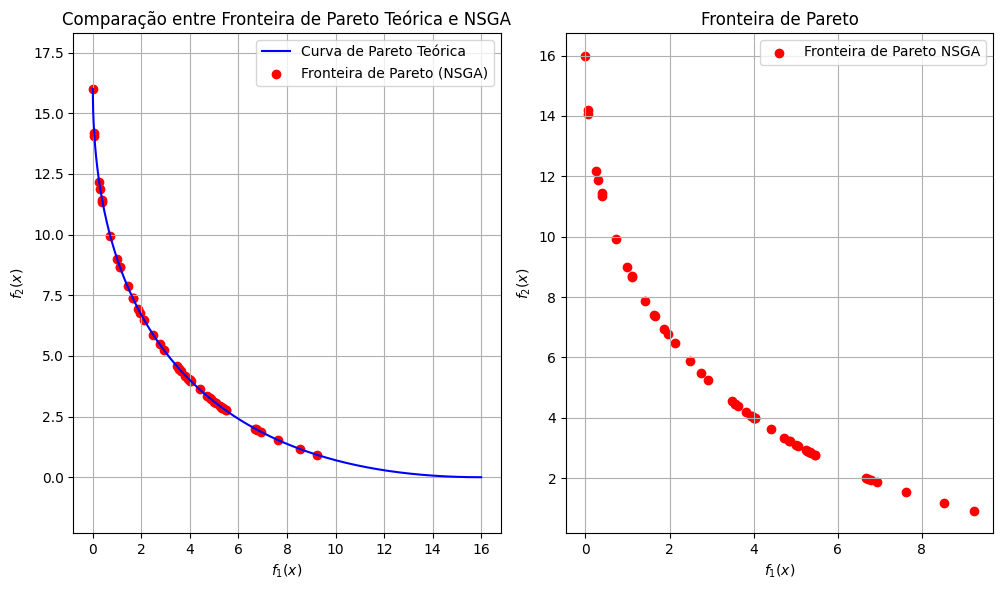

In [11]:
# Executar NSGA-II 30 generations
nsga2_with_theorical(pop_size=50, generations=30, bounds=(-5, 5))

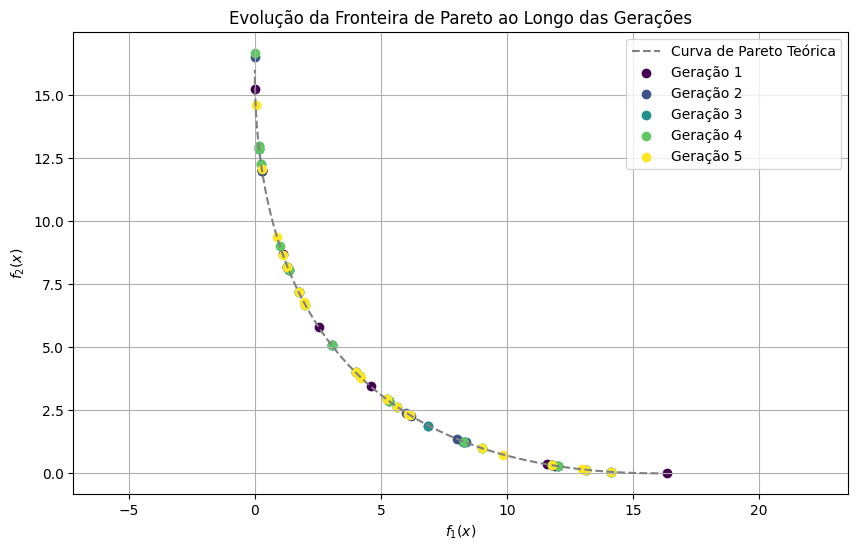

In [12]:
def nsga2_with_theorical_and_generations(pop_size, generations, bounds, base_mutation_rate=0.1):
    population = initialize_population(pop_size, bounds)
    
    colors = plt.cm.viridis(np.linspace(0, 1, generations))  # Gradiente de cores para as gerações
    
    plt.figure(figsize=(10, 6))
    plt.plot(f1_theoretical, f2_theoretical, label="Curva de Pareto Teórica", color="gray", linestyle="--")
    
    for gen in range(generations):
        # Avaliar a nova população
        objectives = evaluate_population(population)
        fronts, _ = fast_nondominated_sort(objectives)

        # Plotar a primeira fronteira da geração atual
        pareto_front = [objectives[i] for i in fronts[0]]
        pareto_front.sort()
        plt.scatter(*zip(*pareto_front), label=f"Geração {gen + 1}", color=colors[gen])

        # Mutação adaptativa
        mutation_rate = base_mutation_rate * (1 - gen / generations)
        
        # Criar descendentes usando operadores genéticos
        offspring = []
        while len(offspring) < pop_size:
            # Seleção de dois pais
            parent1, parent2 = random.sample(population, 2)
            # Cruzamento
            child = crossover(parent1, parent2)
            # Mutação
            child = mutation(child, bounds, mutation_rate)       
            offspring.append(child)
            
        # Combinar pais e descendentes
        combined_population = population + offspring
        combined_objectives = evaluate_population(combined_population)
        
        # Realizar nova ordenação não-dominada
        combined_fronts, _ = fast_nondominated_sort(combined_objectives)
        
        # Selecionar próxima geração com elitismo
        population = select_next_population(combined_fronts, combined_objectives, combined_population, pop_size)
    
    plt.title("Evolução da Fronteira de Pareto ao Longo das Gerações")
    plt.xlabel("$f_1(x)$")
    plt.ylabel("$f_2(x)$")
    plt.legend()
    plt.axis("equal")
    plt.grid()
    plt.show()

# Executar NSGA-II
nsga2_with_theorical_and_generations(pop_size=20, generations=5, bounds=(-5, 5))


### Passando o problema para duas variáveis de entrada
**Atenção!** Ao executar o código a seguir alguns métodos dos blocos precedentes serão reescritos. Por isso, se for executar novamente é necessário executar os blocos iniciais de definições das funções e das operações essenciais.

[(0.8371647110047424, 21.26889948906189), (13.139883292574792, 3.4658360266899266), (3.9399821988208346, 7.84285905571498)]
[(3.9399821988208346, 7.84285905571498), (0.20611205110718117, 14.403667907963873), (5.11395505816004, 3.550512341169327), (3.860609590143417, 8.082644212901698), (20.84432161701007, 0.37569232468282304), (16.541113869502663, 0.6744471931395613), (18.768358293508832, 0.5699839918970598), (1.3138961875678765, 8.144701528018885), (11.356755196469337, 1.7509803305218798)]
[(0.20611205110718117, 14.403667907963873), (16.541113869502663, 0.6744471931395613), (1.3138961875678765, 8.144701528018885), (18.075615637287534, 0.06499234466781466), (4.213109477403202, 3.901414402212827), (1.0448580796915121, 9.163544294293608), (6.565258528350577, 2.897073008924167), (17.97708677181558, 0.5837037699969596), (13.623408748881856, 1.3364095012698964), (11.092536900230902, 1.4846482161793642), (4.959979597041564, 3.1455517135885644), (1.8797235654765196, 7.6520666867785705), (7.88

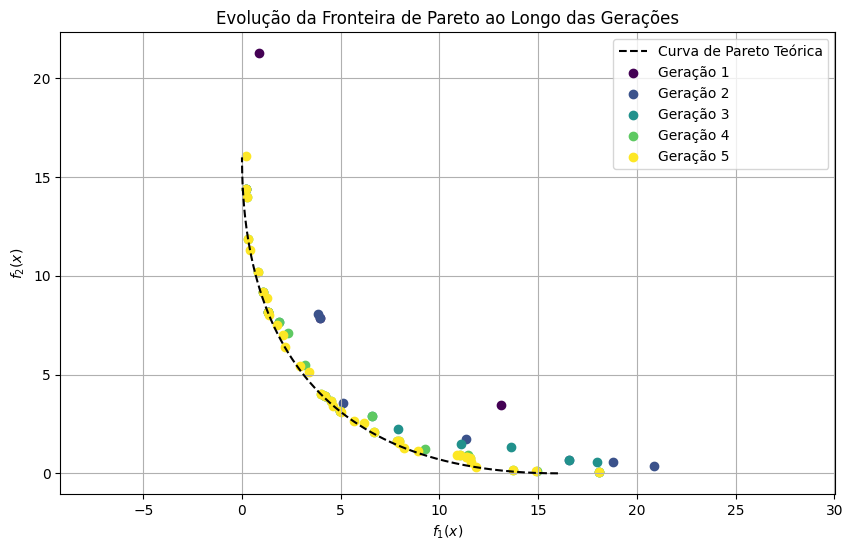

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Funções objetivo
def f_1(x, y):
    return (x - 2)**2 + y**2

def f_2(x, y):
    return (x + 2)**2 + y**2

# Inicialização da população
def initialize_population(size, bounds):
    return [np.array([random.uniform(bounds[0], bounds[1]),
                      random.uniform(bounds[0], bounds[1])]) for _ in range(size)]

# Avaliação
def evaluate_population(population):
    return [(f_1(ind[0], ind[1]), f_2(ind[0], ind[1])) for ind in population]

def select_next_population(fronts, objectives, population, pop_size):
    next_population = []
    for front in fronts:
        if len(next_population) + len(front) <= pop_size:
            next_population.extend(front)
        else:
            distances = crowding_distance(front, objectives)
            sorted_front = sorted(zip(front, distances), key=lambda x: x[1], reverse=True)
            next_population.extend([solution for solution, _ in sorted_front[:pop_size - len(next_population)]])
            break
    return [population[i] for i in next_population]

# Algoritmo NSGA
def nsga(pop_size, generations, bounds, base_mutation_rate=0.1):
    population = initialize_population(pop_size, bounds)
    colors = plt.cm.viridis(np.linspace(0, 1, generations))  # Gradiente de cores para as gerações

    # Gerar a curva de Pareto teórica
    x_theoretical = np.linspace(-2, 2, 500)
    f1_theoretical = [(f_1(x, 0)) for x in x_theoretical]
    f2_theoretical = [(f_2(x, 0)) for x in x_theoretical]

    plt.figure(figsize=(10, 6))
    plt.plot(f1_theoretical, f2_theoretical, label="Curva de Pareto Teórica", color="black", linestyle="--")

    for gen in range(generations):
        # Avaliar a nova população
        objectives = evaluate_population(population)
        fronts, _ = fast_nondominated_sort(objectives)

        # Plotar a primeira fronteira da geração atual
        pareto_front = [objectives[i] for i in fronts[0]]
        print(pareto_front)
        pareto_front.sort()
        plt.scatter(*zip(*pareto_front), label=f"Geração {gen + 1}", color=colors[gen])

        # Mutação adaptativa
        mutation_rate = base_mutation_rate * (1 - gen / generations)
        
        # Criar descendentes usando operadores genéticos
        offspring = []
        while len(offspring) < pop_size:
            # Seleção de dois pais
            parent1, parent2 = random.sample(population, 2)
            # Cruzamento
            child = crossover(parent1, parent2)
            # Mutação
            child = mutation(child, bounds, mutation_rate)       
            offspring.append(child)
            
        # Combinar pais e descendentes
        combined_population = population + offspring
        combined_objectives = evaluate_population(combined_population)
        
        # Realizar nova ordenação não-dominada
        combined_fronts, _ = fast_nondominated_sort(combined_objectives)
        
        # Selecionar próxima geração com elitismo
        population = select_next_population(combined_fronts, combined_objectives, combined_population, pop_size)
    
    plt.title("Evolução da Fronteira de Pareto ao Longo das Gerações")
    plt.xlabel("$f_1(x)$")
    plt.ylabel("$f_2(x)$")
    plt.legend()
    plt.axis("equal")
    plt.grid()
    plt.show()

# Executar NSGA
nsga(pop_size=50, generations=5, bounds=(-7, 7))


## NSGA-III

O NSGA-III (Non-dominated Sorting Genetic Algorithm III) é uma extensão do NSGA-II, projetado para otimização multiobjetivo com um número maior de objetivos (tipicamente mais de três). Enquanto o NSGA-II utiliza a distância de crowding para manter a diversidade na população, o NSGA-III introduz um método baseado em pontos de referência (reference points) e nichos para melhorar a distribuição das soluções ao longo da fronteira de Pareto, especialmente em problemas de alta dimensionalidade.

No código a seguir, adaptamos o algoritmo NSGA-III para um problema com dois objetivos para fins ilustrativos, embora o NSGA-III seja mais eficaz em problemas com mais objetivos. As modificações feitas asseguram que o algoritmo funcione corretamente, evitando loops infinitos e melhorando a eficiência computacional.

### Resumo da família de algoritmos NSGA

Cada versão do algoritmo NSGA traz avanços importantes:

- **NSGA**: Foi inovador ao introduzir o conceito de ordenamento não dominado e função de compartilhamento para diversidade, mas sofreu com limitações de complexidade e falta de elitismo.
- **NSGA-II**: Tornou o algoritmo mais eficiente e robusto com a introdução do elitismo e da distância de aglomeração, tornando-se o padrão para otimização multiobjetivo com até três objetivos.
- **NSGA-III**: Ampliou as capacidades do NSGA-II para problemas de muitos objetivos, com uma abordagem baseada em pontos de referência que garante uma boa distribuição de soluções na fronteira de Pareto.

As diferenças entre as três versões refletem a evolução no desenvolvimento de algoritmos evolutivos multiobjetivo. A tabela a seguir apresenta um comparativo geral:


| Característica           | NSGA                          | NSGA-II                    | NSGA-III                                        |
| ------------------------ | ----------------------------- | -------------------------- | ----------------------------------------------- |
| Ordenamento Não Dominado | $O(MN^3)$, sem elitismo       | $O(MN^2)$, com elitismo    | $O(MN^2)$, com elitismo e pontos de referência  |
| Diversidade              | Função de Compartilhamento    | Distância de Aglomeração   | Distância de Aglomeração e Pontos de Referência |
| Eficiência Computacional | Baixa                         | Alta para poucos objetivos | Moderada, com ajuste de pontos de referência    |
| Aplicabilidade           | Problemas de poucos objetivos | Até três objetivos         | Muitos objetivos (alta dimensionalidade)        |



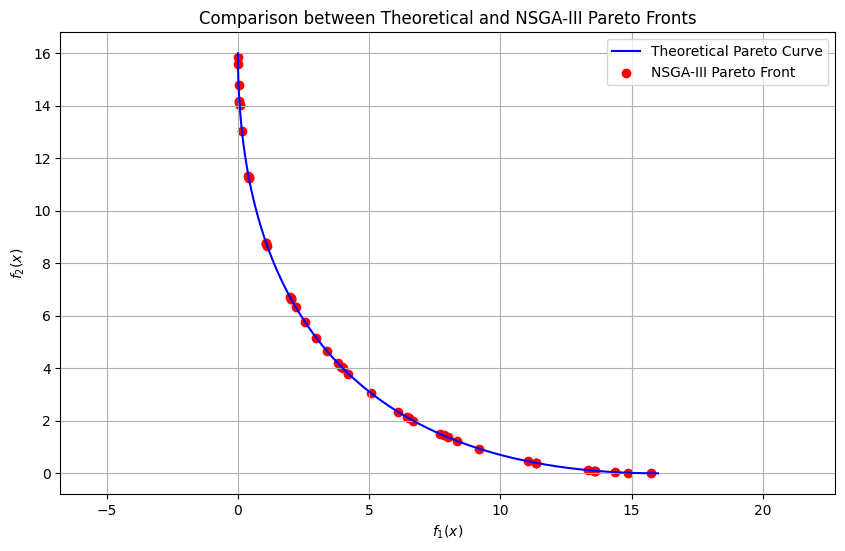

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Objective functions
def f1(x):
    """Objective function 1"""
    return (x - 2) ** 2

def f2(x):
    """Objective function 2"""
    return (x + 2) ** 2

# Population initialization
def initialize_population(size, bounds):
    """Initializes the population with random values within the given bounds."""
    return [random.uniform(bounds[0], bounds[1]) for _ in range(size)]

# Evaluation
def evaluate_population(population):
    """Evaluates each individual in the population on the objective functions."""
    return [(f1(x), f2(x)) for x in population]

# Dominance
def dominates(obj1, obj2):
    """
    Checks if obj1 dominates obj2:
    - obj1 is not worse than obj2 in all objectives.
    - obj1 is strictly better than obj2 in at least one objective.
    """
    return all(x <= y for x, y in zip(obj1, obj2)) and any(x < y for x, y in zip(obj1, obj2))

# Non-dominated sorting
def fast_nondominated_sort(objectives):
    """
    Sorts solutions into non-dominated fronts.
    Returns a list of lists (the dominance fronts).
    """
    population_size = len(objectives)
    S = [[] for _ in range(population_size)]
    n = [0] * population_size
    rank = [0] * population_size
    fronts = [[]]

    for p in range(population_size):
        for q in range(population_size):
            if dominates(objectives[p], objectives[q]):
                S[p].append(q)
            elif dominates(objectives[q], objectives[p]):
                n[p] += 1
        if n[p] == 0:
            rank[p] = 0
            fronts[0].append(p)

    i = 0
    while fronts[i]:
        next_front = []
        for p in fronts[i]:
            for q in S[p]:
                n[q] -= 1
                if n[q] == 0:
                    rank[q] = i + 1
                    next_front.append(q)
        i += 1
        fronts.append(next_front)
    fronts.pop()
    return fronts

# Generate reference points
def generate_reference_points(M, p):
    """Generates reference points uniformly on the unit simplex in M dimensions."""
    def generate_recursive(points, num_objs, left, total, depth, current_point):
        if depth == num_objs - 1:
            current_point.append(left / total)
            points.append(current_point.copy())
            current_point.pop()
        else:
            for i in range(left + 1):
                current_point.append(i / total)
                generate_recursive(points, num_objs, left - i, total, depth + 1, current_point)
                current_point.pop()
    points = []
    generate_recursive(points, M, p, p, 0, [])
    return np.array(points)

# Environmental selection
def environmental_selection(population, objectives, fronts, reference_points, pop_size):
    next_population_indices = []
    for front in fronts:
        if len(next_population_indices) + len(front) <= pop_size:
            next_population_indices.extend(front)
        else:
            N = pop_size - len(next_population_indices)
            selected_indices = niching_selection(front, objectives, reference_points, N)
            next_population_indices.extend(selected_indices)
            break
    next_population = [population[i] for i in next_population_indices]
    return next_population

# Niching selection
def niching_selection(front, objectives, reference_points, N):
    selected = []
    # Normalize objectives
    objs = np.array([objectives[i] for i in front])
    ideal_point = np.min(objs, axis=0)
    normalized_objs = objs - ideal_point

    # Avoid division by zero
    max_values = np.max(normalized_objs, axis=0)
    max_values[max_values == 0] = 1
    normalized_objs = normalized_objs / max_values

    # Associate each individual with the nearest reference point
    associations = []
    for idx, obj in zip(front, normalized_objs):
        distances = np.linalg.norm(obj - reference_points, axis=1)
        min_index = np.argmin(distances)
        associations.append((idx, min_index, distances[min_index]))

    # Build a dictionary of associations
    reference_associations = defaultdict(list)
    for idx, ref_idx, dist in associations:
        reference_associations[ref_idx].append((idx, dist))

    # Niche counts
    niche_counts = {i: 0 for i in range(len(reference_points))}
    selected_flags = {idx: False for idx in front}

    while len(selected) < N:
        # Find reference points with minimum niche count
        min_niche_count = min(niche_counts.values())
        min_refs = [ref for ref, count in niche_counts.items() if count == min_niche_count]

        for ref_idx in min_refs:
            # Get unselected individuals associated with this reference point
            assoc_inds = reference_associations.get(ref_idx, [])
            unselected_inds = [(idx, dist) for idx, dist in assoc_inds if not selected_flags[idx]]

            if unselected_inds:
                # Select the individual with the minimum distance
                unselected_inds.sort(key=lambda x: x[1])
                selected_idx = unselected_inds[0][0]
                selected.append(selected_idx)
                selected_flags[selected_idx] = True
                niche_counts[ref_idx] += 1
                break  # Move to the next reference point

        else:
            # If no individuals can be selected, select randomly from unselected individuals
            remaining = [idx for idx in front if not selected_flags[idx]]
            if remaining:
                selected_idx = random.choice(remaining)
                selected.append(selected_idx)
                selected_flags[selected_idx] = True
            else:
                break  # All individuals have been selected

    return selected[:N]

# Precompute ranks for tournament selection
def compute_individual_ranks(fronts):
    individual_ranks = {}
    for rank, front in enumerate(fronts):
        for idx in front:
            individual_ranks[idx] = rank
    return individual_ranks

# Tournament selection
def tournament_selection(population, individual_ranks):
    i1, i2 = random.sample(range(len(population)), 2)
    rank1 = individual_ranks[i1]
    rank2 = individual_ranks[i2]
    if rank1 < rank2:
        return population[i1]
    elif rank2 < rank1:
        return population[i2]
    else:
        return population[random.choice([i1, i2])]

# Crossover
def crossover(parent1, parent2):
    """Performs weighted average crossover between two parents to generate a child."""
    w = random.uniform(0, 1)
    return w * parent1 + (1 - w) * parent2

# Mutation
def mutation(individual, bounds, mutation_rate):
    """Applies adaptive mutation to an individual with a certain probability."""
    if random.random() < mutation_rate:
        mutation_amount = random.uniform(-0.1, 0.1)
        individual += mutation_amount
        individual = np.clip(individual, bounds[0], bounds[1])
    return individual

# NSGA-III Algorithm
def nsga3(pop_size, generations, bounds, base_mutation_rate=0.1, divisions=4):
    """Implements the NSGA-III algorithm."""
    # Initialization
    population = initialize_population(pop_size, bounds)
    M = 2  # Number of objectives
    reference_points = generate_reference_points(M, divisions)

    for gen in range(generations):
        # Evaluate current population
        objectives = evaluate_population(population)
        # Non-dominated sorting
        fronts = fast_nondominated_sort(objectives)
        # Compute individual ranks
        individual_ranks = compute_individual_ranks(fronts)

        # Generate offspring
        offspring_population = []
        while len(offspring_population) < pop_size:
            # Selection
            parent1 = tournament_selection(population, individual_ranks)
            parent2 = tournament_selection(population, individual_ranks)
            # Crossover
            child = crossover(parent1, parent2)
            # Mutation
            mutation_rate = base_mutation_rate * (1 - gen / generations)
            child = mutation(child, bounds, mutation_rate)
            offspring_population.append(child)

        # Combine populations
        combined_population = population + offspring_population
        # Evaluate combined population
        combined_objectives = evaluate_population(combined_population)
        # Non-dominated sorting on combined population
        combined_fronts = fast_nondominated_sort(combined_objectives)
        # Environmental selection
        population = environmental_selection(combined_population, combined_objectives, combined_fronts, reference_points, pop_size)

    # Final evaluation
    objectives = evaluate_population(population)
    fronts = fast_nondominated_sort(objectives)
    pareto_front = [objectives[i] for i in fronts[0]]
    pareto_front.sort()

    # Theoretical Pareto curve
    x_theoretical = np.linspace(-2, 2, 500)
    f1_theoretical = f1(x_theoretical)
    f2_theoretical = f2(x_theoretical)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(f1_theoretical, f2_theoretical, label="Theoretical Pareto Curve", color="blue")
    plt.scatter(*zip(*pareto_front), label="NSGA-III Pareto Front", color="red")
    plt.title("Comparison between Theoretical and NSGA-III Pareto Fronts")
    plt.xlabel("$f_1(x)$")
    plt.ylabel("$f_2(x)$")
    plt.legend()
    plt.axis("equal")
    plt.grid()
    plt.show()

# Run NSGA-III
nsga3(pop_size=50, generations=10, bounds=(-5, 5), divisions=10)


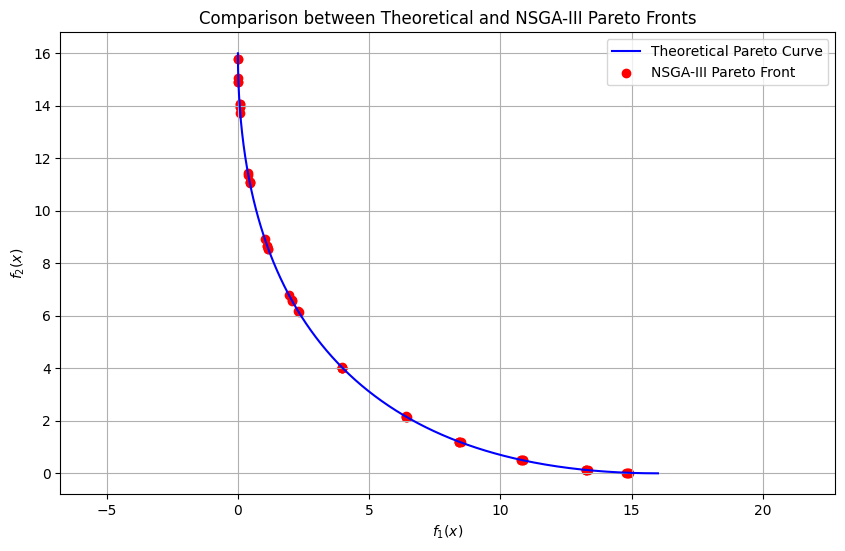

In [15]:
# Run NSGA-III 20 genarations
nsga3(pop_size=50, generations=20, bounds=(-5, 5), divisions=10)

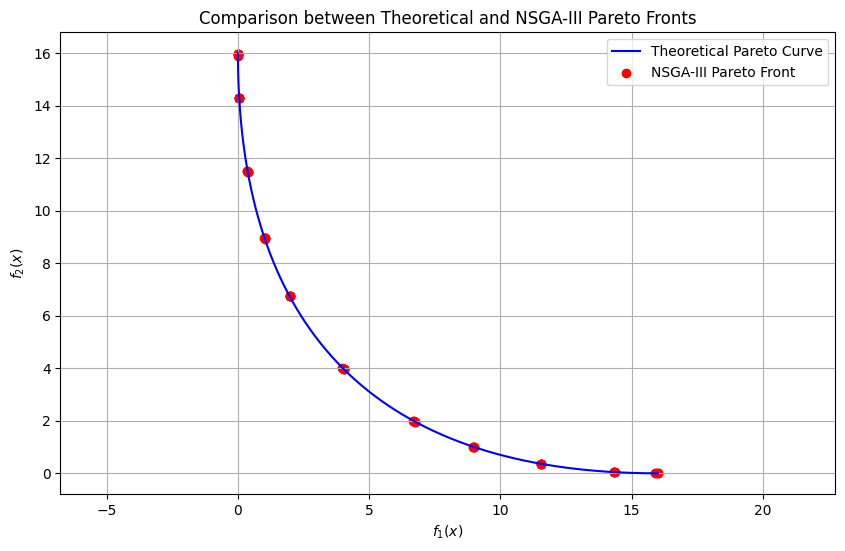

In [16]:
# Run NSGA-III 30 generations
nsga3(pop_size=50, generations=30, bounds=(-5, 5), divisions=10)

### **Visão Geral do Algoritmo NSGA-III**

O NSGA-III é um algoritmo evolucionário que busca encontrar um conjunto de soluções não-dominadas (fronteira de Pareto) para problemas de otimização multiobjetivo. Ele segue uma estrutura similar ao NSGA-II, mas com modificações significativas na etapa de seleção ambiental para lidar com múltiplos objetivos.

**Principais Etapas do Algoritmo:**

1. **Inicialização da População**
2. **Avaliação das Funções Objetivo**
3. **Ordenação Não-Dominada (Fast Non-Dominated Sorting)**
4. **Geração de Pontos de Referência**
5. **Seleção Ambiental com Base em Nichos**
6. **Operadores Genéticos (Seleção, Cruzamento e Mutação)**
7. **Iteração até Convergência ou Número Máximo de Gerações**

---

### **Descrição Detalhada das Etapas**

#### **1. Inicialização da População**

- **Função:** `initialize_population(size, bounds)`
- **Descrição:** Gera uma população inicial de indivíduos aleatórios dentro dos limites definidos. Cada indivíduo é representado por um valor `x` no espaço de decisão.

#### **2. Avaliação das Funções Objetivo**

- **Função:** `evaluate_population(population)`
- **Descrição:** Avalia cada indivíduo nas funções objetivo `f1(x)` e `f2(x)`, resultando em um par de valores que representam a aptidão do indivíduo em cada objetivo.

#### **3. Ordenação Não-Dominada**

- **Função:** `fast_nondominated_sort(objectives)`
- **Descrição:** Classifica os indivíduos em diferentes frentes de dominância com base nas suas avaliações nos objetivos. Indivíduos na primeira frente não são dominados por nenhum outro indivíduo na população.

#### **4. Geração de Pontos de Referência**

- **Função:** `generate_reference_points(M, p)`
- **Descrição:** Gera um conjunto de pontos de referência uniformemente distribuídos no simplex unitário em `M` dimensões, onde `M` é o número de objetivos e `p` é o número de divisões do simplex.

- **Importância:** Esses pontos de referência são utilizados para guiar a seleção ambiental, garantindo que as soluções sejam distribuídas uniformemente ao longo da fronteira de Pareto.

#### **5. Seleção Ambiental com Base em Nichos**

- **Função Principal:** `environmental_selection(population, objectives, fronts, reference_points, pop_size)`
- **Componentes:**
  - **Normalização dos Objetivos:**
    - Os valores das funções objetivo são normalizados para garantir uma comparação justa entre diferentes objetivos.
  - **Associação aos Pontos de Referência:**
    - **Função:** `niching_selection(front, objectives, reference_points, N)`
    - Cada indivíduo é associado ao ponto de referência mais próximo no espaço normalizado.
  - **Contagem de Nichos:**
    - Mantém uma contagem de quantos indivíduos estão associados a cada ponto de referência.
  - **Seleção dos Indivíduos:**
    - Seleciona indivíduos para a próxima geração com base na contagem de nichos, priorizando pontos de referência com menor contagem para manter a diversidade.

- **Diferença Chave em Relação ao NSGA-II:**
  - Enquanto o NSGA-II utiliza a distância de crowding (distância entre indivíduos vizinhos no espaço objetivo) para manter a diversidade, o NSGA-III utiliza pontos de referência e associações de nicho, o que é mais eficaz em espaços de alta dimensionalidade.

#### **6. Operadores Genéticos**

- **Seleção por Torneio:**
  - **Função:** `tournament_selection(population, individual_ranks)`
  - Seleciona pais para cruzamento com base nos ranks dos indivíduos nas frentes não-dominadas.

- **Cruzamento:**
  - **Função:** `crossover(parent1, parent2)`
  - Realiza um cruzamento de média ponderada entre dois pais para gerar um filho.

- **Mutação:**
  - **Função:** `mutation(individual, bounds, mutation_rate)`
  - Aplica mutação adaptativa ao indivíduo com uma taxa que decresce ao longo das gerações.

#### **7. Iteração e Convergência**

- O algoritmo repete as etapas acima para um número definido de gerações ou até que algum critério de convergência seja atendido.

- **Visualização dos Resultados:**
  - Ao final, o algoritmo plota a fronteira de Pareto obtida e a compara com a fronteira teórica, permitindo avaliar o desempenho do algoritmo.

---

### **Diferenças entre NSGA-III e NSGA-II**

#### **1. Estratégia de Preservação da Diversidade**

- **NSGA-II:**
  - Utiliza a **distância de crowding**, que calcula a distância entre um indivíduo e seus vizinhos imediatos na mesma fronteira não-dominada.
  - É eficaz para problemas com dois ou três objetivos, mas a eficiência diminui em problemas com mais objetivos devido à dificuldade de manter uma distribuição uniforme.

- **NSGA-III:**
  - Introduz **pontos de referência (reference points)** e uma estratégia de **nichos** para preservar a diversidade.
  - Cada indivíduo é associado ao ponto de referência mais próximo, e a seleção ambiental prioriza pontos de referência com menos indivíduos associados.
  - Essa abordagem é mais escalável e eficaz em problemas com muitos objetivos (alta dimensionalidade), garantindo uma melhor distribuição das soluções na fronteira de Pareto.

#### **2. Seleção Ambiental**

- **NSGA-II:**
  - Baseia-se na combinação do rank de dominância e da distância de crowding para ordenar os indivíduos.
  - Indivíduos com menor rank e maior distância de crowding são preferidos.

- **NSGA-III:**
  - Após a ordenação não-dominada, a seleção ambiental é baseada na associação aos pontos de referência e nas contagens de nicho.
  - Isso permite selecionar indivíduos que contribuem para uma melhor cobertura da fronteira de Pareto.

#### **3. Aplicabilidade a Problemas com Múltiplos Objetivos**

- **NSGA-II:**
  - Desempenha bem em problemas com até três objetivos.
  - A eficácia diminui à medida que o número de objetivos aumenta devido à dificuldade de calcular distâncias de crowding significativas.

- **NSGA-III:**
  - Projetado especificamente para lidar com problemas de otimização com muitos objetivos (quatro ou mais).
  - O uso de pontos de referência facilita a manutenção da diversidade em espaços de alta dimensionalidade.

#### **4. Complexidade Computacional**

- **NSGA-II:**
  - A complexidade está relacionada ao cálculo das distâncias de crowding e à ordenação não-dominada.
  - Pode ser menos eficiente em problemas de alta dimensionalidade.

- **NSGA-III:**
  - A complexidade adicional vem da geração de pontos de referência e do processo de associação e niching.
  - Apesar da complexidade, é mais eficiente em manter a diversidade em problemas com muitos objetivos.

## Referências

**K. Deb, A. Pratap, S. Agarwal, and T. Meyarivan**, *"A Fast and Elitist Multiobjective Genetic Algorithm: NSGA-II,"* IEEE Transactions on Evolutionary Computation, vol. 6, no. 2, pp. 182–197, Apr. 2002.

**K. Deb and H. Jain**, *"An Evolutionary Many-Objective Optimization Algorithm Using Reference-Point-Based Nondominated Sorting Approach, Part I: Solving Problems With Box Constraints,"* in IEEE Transactions on Evolutionary Computation, vol. 18, no. 4, pp. 577–601, Aug. 2014.

**K. Deb**, *"Multi-Objective Optimization Using Evolutionary Algorithms,"* John Wiley & Sons, 2001.
